In [117]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import cv2

import plotly
from plotly.graph_objs import *

import time

# from ndreg import *
# import ndio.remote.neurodata as neurodata
import nibabel as nib

In [118]:
def plot_hist(im, title=''):
    hist,bins = np.histogram(im.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(im.flatten(),256,[0,256], color = 'r')
    plt.title(title)
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

In [119]:
def img_copy(img):
    """
    Returns a copy of the input image
    """
    return sitk.Image(img)

In [120]:
def thresh(im, val):
    """Thresholding the image s.t. any pixel with intensity less than val is set to 0, and
    and pixel with intensity above is set to 255. 
    """
    im_t = np.copy(im)

    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            for z in range(im.shape[2]):
                if im[x, y, z] < val:
                    im_t[x, y, z] = 0
                else:
                    im_t[x, y, z] = 255
                    
    return im_t

In [121]:
def thresh_cdf(im, percentile):
    im_t = np.copy(im)
    
    (values, bins) = np.histogram(im_t, bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()
    
    maxIndex = np.argmax(cumValues>percentile)-1
    threshold = bins[maxIndex]
    print(threshold)

    result = thresh(im_t, threshold)
                    
    return result

## Real Data

In [122]:
%matplotlib inline
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2
import nibabel as nib

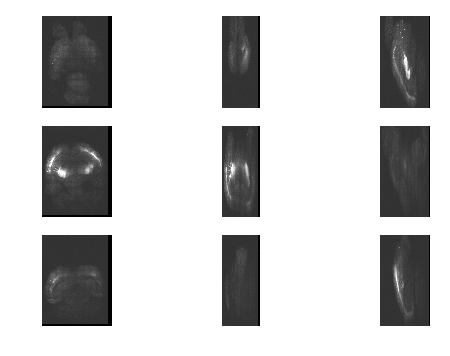

In [6]:
inToken = "Fear199"

inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

inImg_backup = img_copy(inImg)

refToken = "ara_ccf2"
refImg = imgDownload(refToken)
# imgShow(refImg, vmax=500)

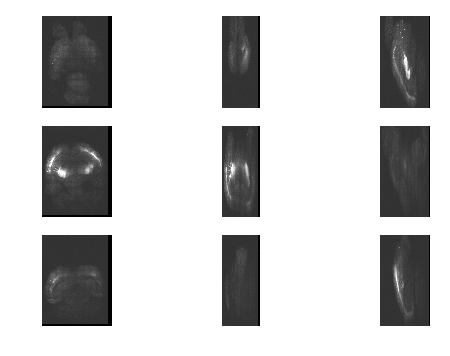

In [7]:
inImg = img_copy(inImg_backup)
imgShow(inImg, vmax=500)

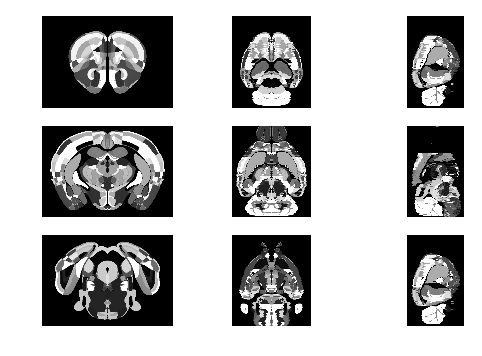

In [29]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)
(0.01872, 0.01872, 0.005)


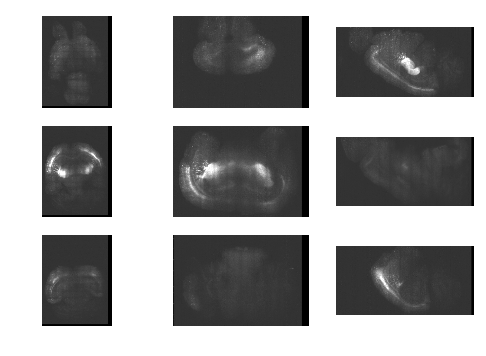

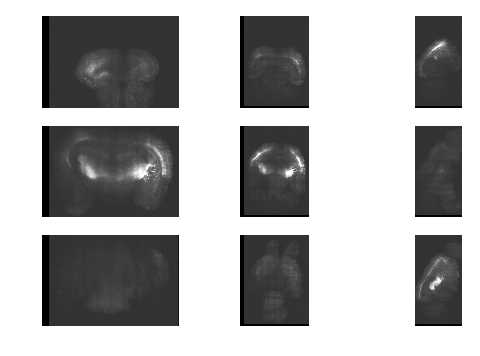

100
100
4070


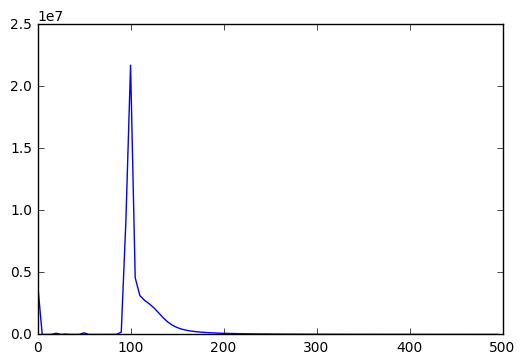

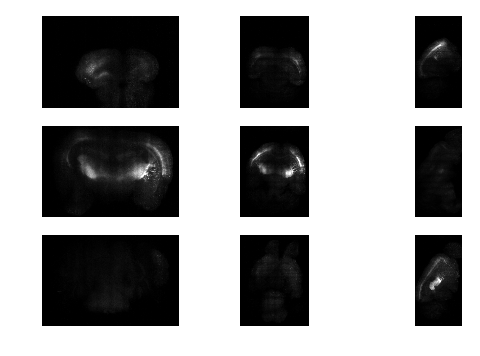

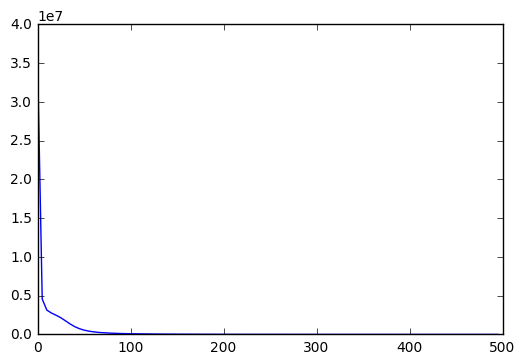

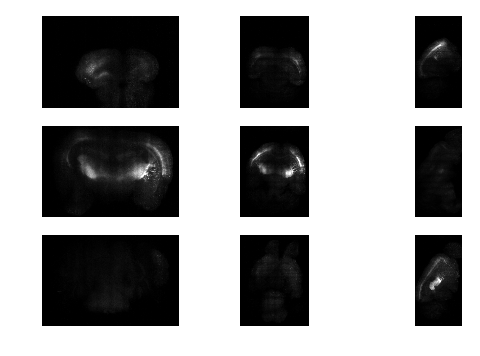

In [8]:
print(refImg.GetSpacing())
print(inImg.GetSpacing())

# Respacing according to the reference image
inImg = imgResample(inImg, spacing=refImg.GetSpacing())
imgShow(inImg, vmax=500)

# Reorienting
inImg = imgReorient(inImg, "LAI", "RSA")
imgShow(inImg, vmax=500)

# Thresholding
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

counts = np.bincount(values)
maximum = np.argmax(bins)
print(maximum)
# print(counts)

lowerThreshold = maximum
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

print(lowerThreshold)
print(upperThreshold)


# 3, 2, 1
inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500)

(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

imgShow(inImg, vmax=500)

# # Saving image
# location = "img/" + 'Fear199' + "_thresh.nii"
# imgWrite(inImg, str(location))

87.318


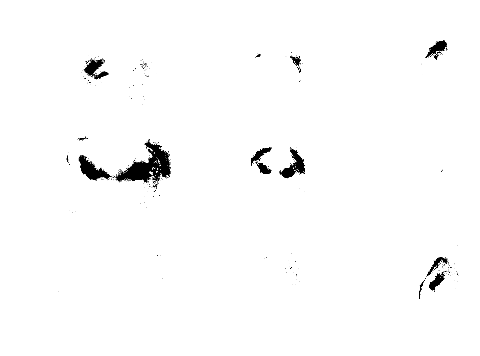

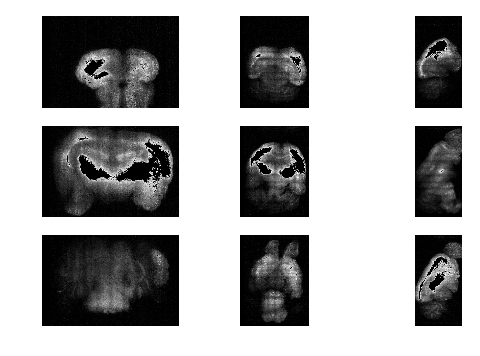

In [28]:
# Generating CLARITY mask
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=1000)
cumValues = np.cumsum(values).astype(float)
cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

maxIndex = np.argmax(cumValues>0.95)-1
threshold = bins[maxIndex]
print(threshold)

inMask = sitk.BinaryThreshold(inImg, 0, threshold, 1, 0)
imgShow(inMask)

imgShow(imgMask(inImg,inMask))

## Affine transformation

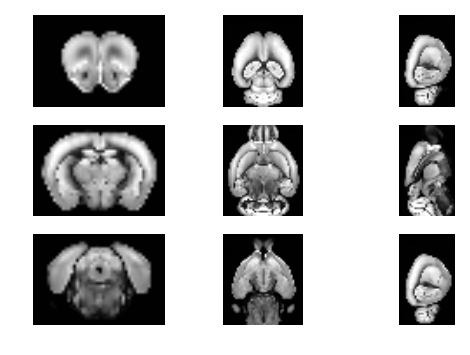

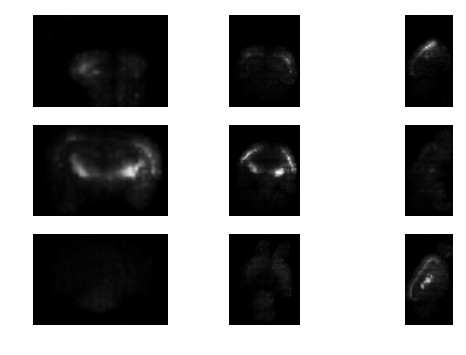

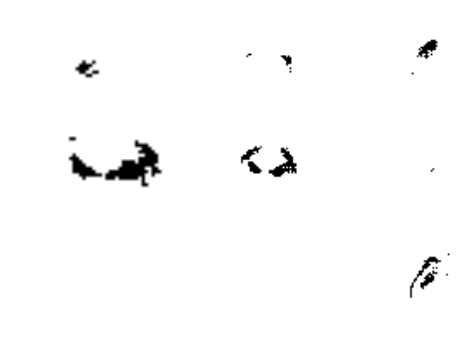

In [30]:
spacing=[0.25,0.25,0.25]
refImg_ds = imgResample(refImg, spacing=spacing)
imgShow(refImg_ds, vmax=500)

inImg_ds = imgResample(inImg, spacing=spacing)
imgShow(inImg_ds, vmax=500)


inMask_ds = imgResample(inMask, spacing=spacing, useNearest=True)
imgShow(inMask_ds)

In [31]:
affine = imgAffineComposite(inImg_ds, refImg_ds, inMask=inMask_ds, iterations=100, useMI=True, verbose=True)

Step translation:
0.	 -0.352980904178
1.	 -0.359464886091
2.	 -0.362478951439
3.	 -0.365100333629
4.	 -0.358811873691
5.	 -0.363170687731
6.	 -0.361050337187
7.	 -0.359459569269
8.	 -0.360742229852
9.	 -0.36298245223
10.	 -0.363440526927
11.	 -0.363688072877
12.	 -0.36354105541
13.	 -0.364014402609
14.	 -0.363876212866
15.	 -0.363604495473
16.	 -0.363751704381
17.	 -0.363846176688
18.	 -0.363805302514
19.	 -0.36379054211
20.	 -0.363800366315
21.	 -0.363797855622
22.	 -0.363798657904
23.	 -0.363796021382
Step rigid:
0.	 -0.379328245307
1.	 -0.310826725928
2.	 -0.392055168967
3.	 -0.398252982224
4.	 -0.405944231226
5.	 -0.403303522218
6.	 -0.410732243767
7.	 -0.413543586076
8.	 -0.413219846733
9.	 -0.415253910487
10.	 -0.415247480319
11.	 -0.41686035394
12.	 -0.417227994323
13.	 -0.418039237449
14.	 -0.417984980323
15.	 -0.418371679665
16.	 -0.418626188266
17.	 -0.418973389223
Step affine:
0.	 -0.407611126843
1.	 -0.406453294342
2.	 -0.417614424352
3.	 -0.436157367521
4.	 -0.436935988236

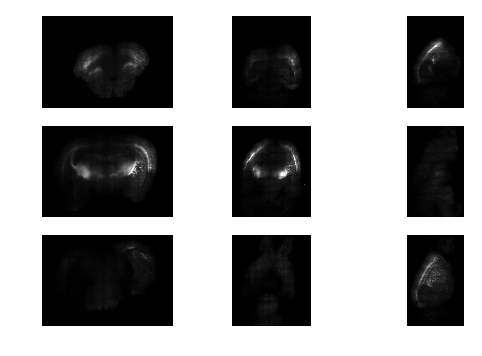

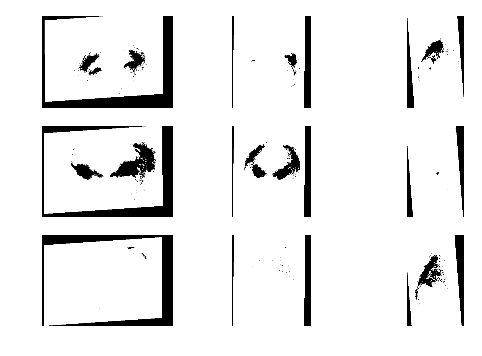

In [32]:
inImg_affine = imgApplyAffine(inImg, affine, size=refImg.GetSize())
imgShow(inImg_affine, vmax=500)

inMask_affine = imgApplyAffine(inMask, affine, size=refImg.GetSize(), useNearest=True)
imgShow(inMask_affine)

# LDDMM


Step 0: alpha=0.05, beta=0.05, scale=1.0
	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	-1.78342e+10, 48.557, 0, -1.78342e+10 (97.3796%), 1.100000e-03
1.	-1.88336e+10, 146.785, 0, -1.88336e+10 (96.2858%), 1.210000e-03
2.	-2.00771e+10, 351.019, 0, -2.00771e+10 (94.9248%), 1.331000e-03
3.	-2.06717e+10, 603.903, 0, -2.06717e+10 (94.274%), 1.464100e-03
4.	-2.12029e+10, 898.325, 0, -2.12029e+10 (93.6926%), 1.610510e-03
5.	-2.15684e+10, 1054.78, 0, -2.15684e+10 (93.2926%), 8.857805e-04
6.	-2.24277e+10, 1202.72, 0, -2.24277e+10 (92.3521%), 9.743586e-04
7.	-2.271e+10, 1302.83, 0, -2.271e+10 (92.0431%), 5.358972e-04
8.	-2.33845e+10, 1414.23, 0, -2.33845e+10 (91.3049%), 5.894869e-04
9.	-2.3543e+10, 1473.33, 0, -2.3543e+10 (91.1315%), 3.242178e-04
10.	-2.36414e+10, 1535.42, 0, -2.36414e+10 (91.0237%), 3.566396e-04
11.	-2.37674e+10, 1605.15, 0, -2.37674e+10 (90.8859%), 3.923035e-04
12.	-2.38755e+10, 1681.43, 0, -2.38755e+10 (90.7676%), 4.315339e-04
13.	-2.39625e+10, 1762.47, 0, -2.3

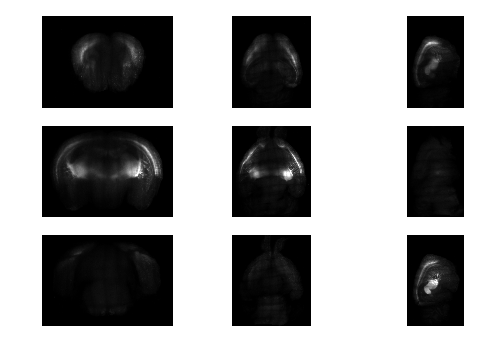

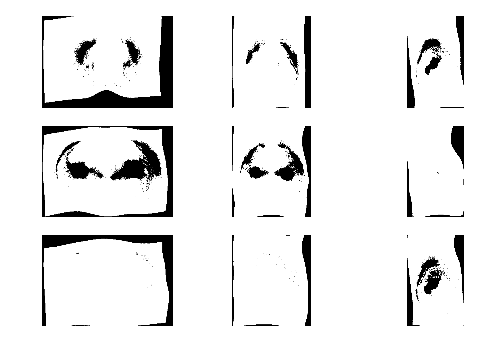

In [34]:
inImg_ds = imgResample(inImg_affine, spacing=spacing)
inMask_ds = imgResample(inMask_affine, spacing=spacing, useNearest=True)
(field, invField) = imgMetamorphosisComposite(inImg_ds, refImg_ds, inMask=inMask_ds, alphaList=[0.05, 0.02, 0.01], useMI=True, iterations=100, verbose=True)
inImg_lddmm = imgApplyField(inImg_affine, field, size=refImg.GetSize())
inMask_lddmm = imgApplyField(inMask_affine, field, size=refImg.GetSize(), useNearest=True)
imgShow(inImg_lddmm, vmax = 500)
imgShow(inMask_lddmm)

In [59]:
# Saving image
location = "img/" + 'Fear199' + "_r.nii"
imgWrite(inImg_lddmm, str(location))

# Saving annotations
location = "img/" + 'Fear199' + "_anno.nii"
imgWrite(refAnnoImg, str(location))



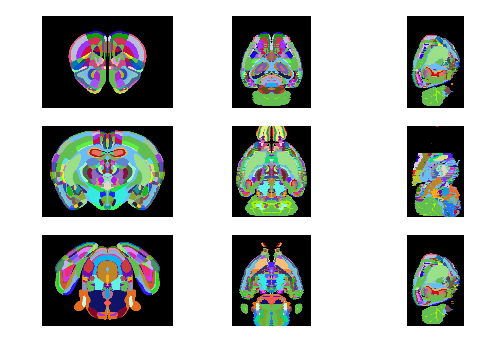

In [52]:
randValues = np.random.rand(1000,3)
randValues = np.concatenate(([[0,0,0]],randValues))
randCmap = matplotlib.colors.ListedColormap (randValues)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap)

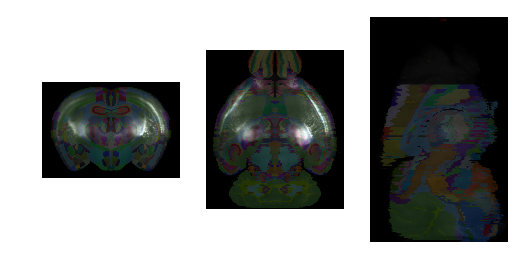

In [53]:
imgShow(inImg_lddmm, vmax=500, newFig=False, numSlices=1)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap, alpha=0.2, newFig=False, numSlices=1)

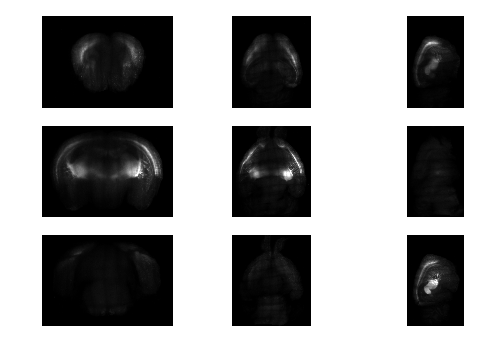

In [54]:
imgShow(inImg_lddmm, vmax = 500)

In [55]:
im = sitk.GetArrayFromImage(inImg_lddmm)
print(im.shape)

anno_im = sitk.GetArrayFromImage(refAnnoImg)
print(anno_im.shape)

(528, 320, 456)
(528, 320, 456)


In [51]:
print(im[200, 200, 200])
print(anno_im[200, 200, 200])

16
498


In [56]:
print(im[200, 200, 200])
print(anno_im[200, 200, 200])

16
498


## after Registration

(456, 320, 528)


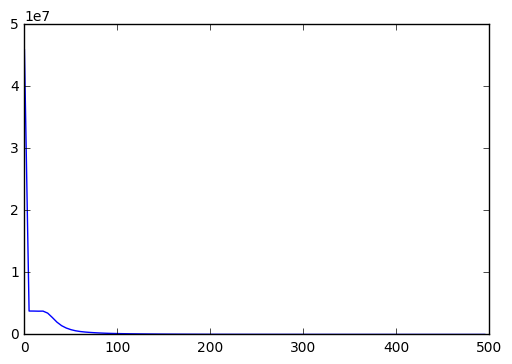

In [11]:
path = "img/" + 'Fear199_r.nii'
real_im = nib.load(path)
real_im = real_im.get_data()

print(real_im.shape)

(values, bins) = np.histogram(real_im, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

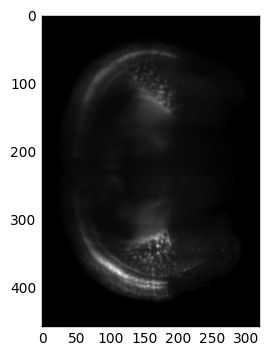

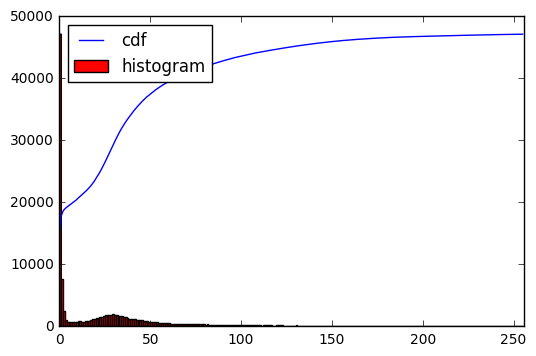

In [12]:
real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [13]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# img_grey = np.array(imgflat * 255, dtype = np.uint8)

img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

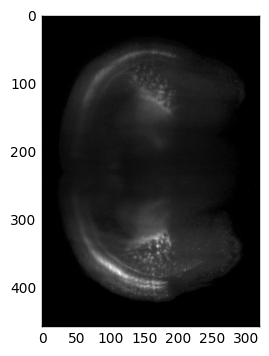

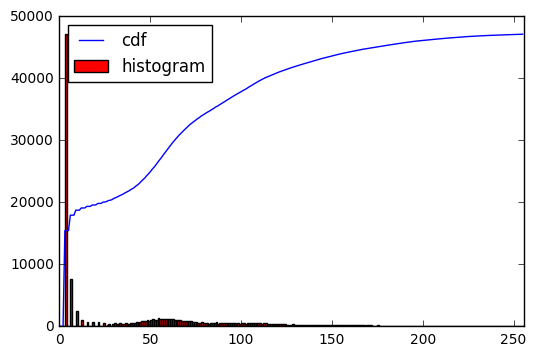

In [14]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

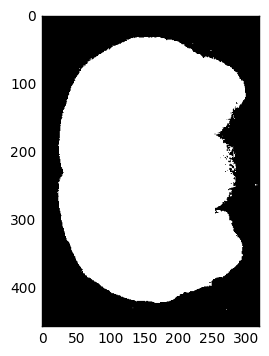

In [16]:
fear_t = thresh(newer_img, 20)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

37.136


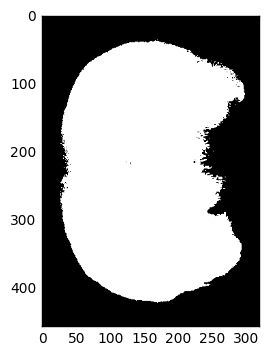

In [23]:
fear_t = thresh_cdf(newer_img, 0.40)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

32.116


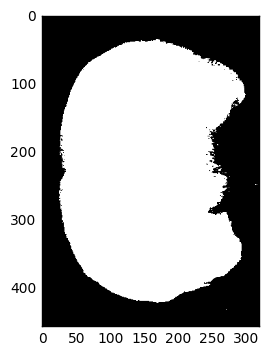

In [24]:
fear_t = thresh_cdf(newer_img, 0.35)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

19.064
num points above thresh: 30363123


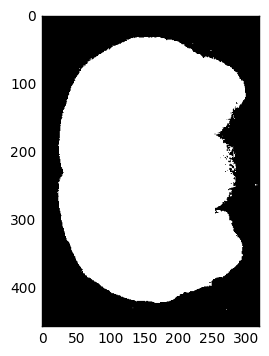

In [27]:
fear_t = thresh_cdf(newer_img, 0.25)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

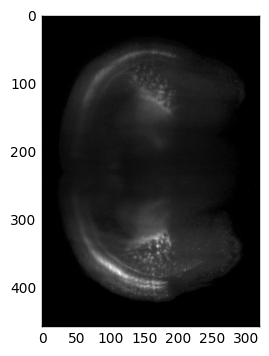

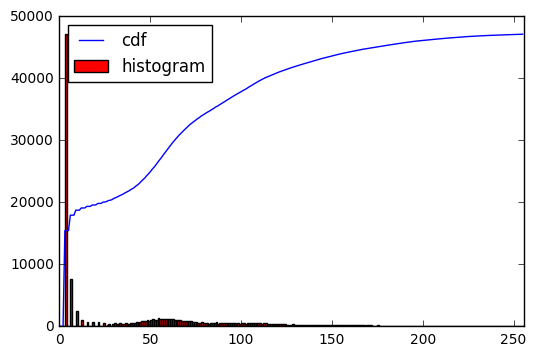

In [30]:
clahe_im = np.copy(newer_img)

clahe_slice = clahe_im[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

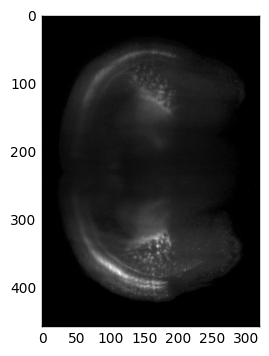

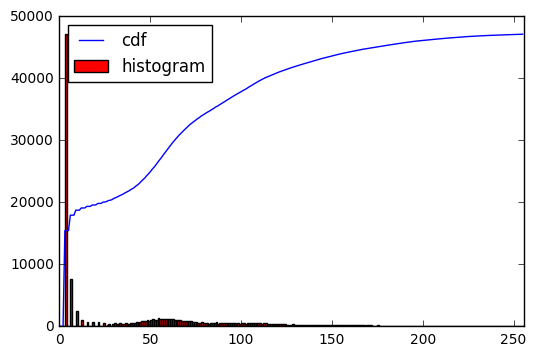

In [68]:
clahe_slice = clahe_im[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

## Downsampling

In [79]:
def downsample(im, num_points = 10000, optimize = True):
    """Method to extract points data from the img file."""
    # obtaining threshold
    percentile = 0.4
    (values, bins) = np.histogram(im, bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

    maxIndex = np.argmax(cumValues>percentile)-1
    threshold = bins[maxIndex]
    print(threshold)
    
    total = im.shape[0] * im.shape[1] * im.shape[2]
#     print("Coverting to points...\ntoken=%s\ntotal=%d\nmax=%f\nthreshold=%f\nnum_points=%d" \
#           %(self._token,total,self._max,threshold,num_points))
    print("(This will take couple minutes)")
    # threshold
    im_max = np.max(im)
    filt = im > threshold
    # a is just a container to hold another value for ValueError: too many values to unpack
    #x, y, z, a = np.where(filt)
    t = np.where(filt)
    x = t[0]
    y = t[1]
    z = t[2]
    v = im[filt]
#     if optimize:
#         self.discardImg()
#     v = np.int16(255 * (np.float32(v) / np.float32(self._max)))
    l = v.shape
    print("Above threshold=%d"%(l))
    # sample

    total_points = l[0]
    print('total points: %d' % total_points)

    if not 0 <= num_points <= total_points:
        raise ValueError("Number of points given should be at most equal to total points: %d" % total_points)
    fraction = num_points / float(total_points)

    if fraction < 1.0:
        # np.random.random returns random floats in the half-open interval [0.0, 1.0)
        filt = np.random.random(size=l) < fraction
        print('v.shape:')
        print(l)
#         print('x.size before downsample: %d' % x.size)
#         print('y.size before downsample: %d' % y.size)
#         print('z.size before downsample: %d' % z.size)
        print('v.size before downsample: %d' % v.size)
        x = x[filt]
        y = y[filt]
        z = z[filt]
        v = v[filt]
#         print('x.size after downsample: %d' % x.size)
#         print('y.size after downsample: %d' % y.size)
#         print('z.size after downsample: %d' % z.size)
        print('v.size after downsample: %d' % v.size)
    points = np.vstack([x,y,z,v])
    points = np.transpose(points)
    print("Output num points: %d"%(points.shape[0]))
    print("Finished")
    return points


In [43]:
def save_points(points, output_path):
    """Saves the points to a file.  Each point consists of [x, y, z, i] where i is the grayscale intensity"""
#     pathname = 'points/Fear199.csv"
    np.savetxt(output_path, points, fmt='%d', delimiter=',')

In [47]:
def generate_pointcloud(points_path, output_path, resolution):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    thedata = None
    thedata = np.genfromtxt(points_path,
        delimiter=',', dtype='int', usecols = (0,1,2), names=['a','b','c'])

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.

    trace1 = Scatter3d(
        x = [x * xResolution for x in thedata['a']],
        y = [x * yResolution for x in thedata['b']],
        z = [x * zResolution for x in thedata['c']],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = Figure(data=data, layout=layout)

    plotly.offline.plot(fig, filename=output_path)

#     plotly.offline.plot(fig, filename= 'output/' + self._token + "/" + self._token + "_brain_pointcloud.html")


In [80]:
im_points = downsample(clahe_im, num_points=10000)

37.136
(This will take couple minutes)
Above threshold=24373485
total points: 24373485
v.shape:
(24373485,)
v.size before downsample: 24373485
v.size after downsample: 9904
Output num points: 9904
Finished


In [81]:
save_points(im_points, 'Fear199_points.csv')

In [82]:
# obtained from doing inImg.getSpacing() for the originally downloaded clarity image
brain_res = (0.01872, 0.01872, 0.005) 
anno_res = (0.024999999999999998, 0.024999999999999998, 0.024999999999999998)
generate_pointcloud('Fear199_points.csv', 'Fear199_pointcloud.html', anno_res)

## Generating graphml

In [102]:
def csv_to_list(path):
    """Method for loading the initial csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [int(line[0]), int(line[1]), int(line[2]), int(line[3])]
            points.append(entry)
            
#     points = np.array(points)
    return points

In [103]:
def plot3d(points_path, output_filename, radius=20):
    """Method for plotting the Nodes and Edges"""
    
#     points = np.genfromtxt(points_path,
#         delimiter=',', dtype='int', usecols = (0,1,2), names=['a','b','c'])

    points = csv_to_list(points_path)

#     outpath = 'output/' + self._token + '/'
    nodename = output_filename + '_nodes.csv'
    edgename = output_filename + '_edges.csv'

    with open(nodename, 'w') as nodefile:
        with open(edgename, 'w') as edgefile:
            for ind in range(len(points)):
                temp = points[ind]
                x = temp[0]
                y = temp[1]
                z = temp[2]
                v = temp[3]
                # radius = 18
#                 radius = 25
                nodefile.write("s" + str(ind + 1) + "," + str(x) + "," + str(y) + "," + str(z) + "\n")
                for index in range(ind + 1, len(points)):
                    tmp = points[index]
                    distance = math.sqrt(math.pow(int(x) - int(tmp[0]), 2) + math.pow(int(y) - int(tmp[1]), 2) + math.pow(int(z) - int(tmp[2]), 2))
                    if distance < radius:
                            edgefile.write("s" + str(ind + 1) + "," + "s" + str(index + 1) + "\n")

In [106]:
def generate_graphml(nodefile_path, edgefile_path, output_path):
    """
    Method for extracting the data to a graphml file, based on the node and edge files.  
    Example outfile_path: Fear199.graphml
    """
    nodes = []
    with open(nodefile_path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1], line[2], line[3]]
            nodes.append(entry)
    
    edges = []
    with open(edgefile_path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1]]
            edges.append(entry)
            
    # Start writing to the output graphml file
    with open(output_path, 'w') as outfile:
        outfile.write("<?xml version=\"1.0\" encoding=\"UTF-8\"?>\n")
        outfile.write("<graphml xmlns=\"http://graphml.graphdrawing.org/xmlns\"\n")
        outfile.write("         xmlns:xsi=\"http://www.w3.org/2001/XMLSchema-instance\"\n")
        outfile.write("         xsi:schemaLocation=\"http://graphml.graphdrawing.org/xmlns\n")
        outfile.write("         http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd\">\n")

        outfile.write("  <key id=\"d0\" for=\"node\" attr.name=\"attr\" attr.type=\"string\"/>\n")
        outfile.write("  <key id=\"e_weight\" for=\"edge\" attr.name=\"weight\" attr.type=\"double\"/>\n")
        outfile.write("  <graph id=\"G\" edgedefault=\"undirected\">\n")

        for line in nodes:
#              if len(line) == 0:
#                  continue
             outfile.write("    <node id=\"" + line[0] + "\">\n")
             outfile.write("      <data key=\"d0\">[" + line[1] + ", " + line[2] + ", " + line[3] +"]</data>\n")
             outfile.write("    </node>\n")

        for line in edges:
#              if len(line) == 0:
#                  continue
             outfile.write("    <edge source=\"" + line[0] + "\" target=\"" + line[1] + "\">\n")
             outfile.write("      <data key=\"e_weight\">1</data>\n")
             outfile.write("    </edge>\n")

        outfile.write("  </graph>\n</graphml>")


In [96]:
plot3d('Fear199_points.csv', 'Fear199', radius=20)

In [108]:
start = time.time()
generate_graphml('Fear199_nodes.csv', 'Fear199_edges.csv', 'Fear199.graphml')
run_time = time.time() - start
print('run time: %f' % run_time)

run time: 0.114961


## Getting the regions

In [ ]:
def csv_to_list2(path):
    """Method for loading the initial csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [line[0], line[1], int(line[2]), int(line[3])]
            points.append(entry)
            
#     points = np.array(points)
    return points

In [115]:
def get_regions(points_path, anno_path, output_path):
    """
    points_path is a .csv
    anno_path is a .nii
    output_path is a .csv (e.g. Fear199_regions.csv)
    """
    atlas = nib.load(anno_path)  # <- atlas .nii image
    atlas_data = atlas.get_data()

    points = np.genfromtxt(points_path, delimiter=',')

    locations = points[:, 0:3]

    regions = [atlas_data[l[0], l[1], l[2]] for l in locations]

    outfile = open(output_path, 'w')
    infile = open(points_path, 'r')
    for i, line in enumerate(infile):
        line = line.strip().split(',')
        outfile.write(",".join(line) + "," + str(regions[i]) + "\n")    # adding a 5th column to the original csv indicating its region (integer)
    infile.close()
    outfile.close()

    print len(regions)
#     print regions[0:10]
    uniq = list(set(regions))
    numRegions = len(uniq)
    print ('num unique regions: %d' % len(uniq))
    print uniq
    
    p = np.genfromtxt(output_path, delimiter=',')
    return p

#     # newToken = Token + '.region'
#     atlas = atlasregiongraph(Token)
    
#     atlas.generate_atlas_region_graph(tupleResolution, None, numRegions)

In [116]:
rp = get_regions('Fear199_points.csv', 'img/Fear199_anno.nii', 'Fear199_regions.csv')
print(rp)

9904
num unique regions: 578
[0, 2, 7, 8, 9, 10, 12, 15, 17, 19, 20, 23, 26, 27, 28, 33, 36, 41, 42, 45, 50, 52, 53, 55, 56, 59, 60, 61, 64, 68, 69, 74, 77, 82, 83, 84, 87, 91, 92, 96, 99, 101, 105, 106, 113, 114, 115, 118, 120, 121, 122, 123, 128, 130, 131, 132, 133, 135, 136, 137, 139, 10723, 146, 148, 149, 151, 155, 156, 159, 160, 162, 163, 167, 169, 170, 171, 175, 178, 180, 181, 183, 186, 187, 188, 189, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 206, 209, 211, 212, 214, 215, 216, 217, 218, 220, 222, 224, 225, 226, 228, 231, 232, 233, 234, 236, 238, 240, 241, 243, 244, 246, 248, 250, 251, 252, 255, 256, 257, 258, 260, 262, 266, 267, 268, 269, 271, 274, 276, 278, 279, 281, 284, 288, 289, 291, 292, 296, 298, 303, 304, 305, 307, 308, 310, 311, 312, 313, 314, 320, 321, 325, 327, 328, 330, 333, 334, 335, 338, 340, 342, 344, 354, 358, 360, 363, 364, 366, 368, 374, 377, 381, 391, 399, 401, 407, 408, 411, 412, 414, 415, 416, 418, 421, 422, 424, 427, 429, 430, 431, 10672, 43

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [111]:
p = np.genfromtxt('Fear199_points.csv', delimiter=',')
print(p)

[[  36.  162.  267.   48.]
 [  37.  137.  315.   47.]
 [  38.  115.  303.   43.]
 ..., 
 [ 424.  124.  333.   43.]
 [ 424.  162.  339.   40.]
 [ 429.  126.  327.   41.]]


# Running on Aut1379

In [123]:
def register(token, orientation, resolution=5):
    """ Saves fully registered brain as token + '_reg.nii'."""
    refToken = "ara_ccf2"
    refImg = imgDownload(refToken)

    refAnnoImg = imgDownload(refToken, channel="annotation")

    inImg = imgDownload(token, resolution=resolution)

    # resampling CLARITY image
    inImg = imgResample(inImg, spacing=refImg.GetSpacing())

    # reorienting CLARITY image
    inImg = imgReorient(inImg, orientation, "RSA")

    # Thresholding
    (values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0, 500))

    counts = np.bincount(values)
    maximum = np.argmax(bins)
    # print(maximum)
    # print(counts)

    lowerThreshold = maximum
    upperThreshold = sitk.GetArrayFromImage(inImg).max() + 1

    # print(lowerThreshold)
    # print(upperThreshold)

    inImg = sitk.Threshold(inImg, lowerThreshold, upperThreshold, lowerThreshold) - lowerThreshold

    # Generating CLARITY mask
    (values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=1000)
    cumValues = np.cumsum(values).astype(float)
    cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

    maxIndex = np.argmax(cumValues > 0.95) - 1
    threshold = bins[maxIndex]

    inMask = sitk.BinaryThreshold(inImg, 0, threshold, 1, 0)

    # Affine Transformation
    spacing = [0.25, 0.25, 0.25]
    refImg_ds = imgResample(refImg, spacing=spacing)

    inImg_ds = imgResample(inImg, spacing=spacing)

    inMask_ds = imgResample(inMask, spacing=spacing, useNearest=True)

    affine = imgAffineComposite(inImg_ds, refImg_ds, inMask=inMask_ds, iterations=100, useMI=True, verbose=True)

    inImg_affine = imgApplyAffine(inImg, affine, size=refImg.GetSize())

    inMask_affine = imgApplyAffine(inMask, affine, size=refImg.GetSize(), useNearest=True)

    # LDDMM Registration
    inImg_ds = imgResample(inImg_affine, spacing=spacing)
    inMask_ds = imgResample(inMask_affine, spacing=spacing, useNearest=True)
    (field, invField) = imgMetamorphosisComposite(inImg_ds, refImg_ds, inMask=inMask_ds, alphaList=[0.05, 0.02, 0.01],
                                                  useMI=True, iterations=100, verbose=True)
    inImg_lddmm = imgApplyField(inImg_affine, field, size=refImg.GetSize())
    inMask_lddmm = imgApplyField(inMask_affine, field, size=refImg.GetSize(), useNearest=True)

    # Saving registered image
    location = "img/" + token + "_reg.nii"
    imgWrite(inImg_lddmm, str(location))

    # Saving annotations
    location = "img/" + token + "_anno.nii"
    imgWrite(refAnnoImg, str(location))

    return inImg_lddmm, refAnnoImg

In [127]:
register('Aut1367', 'RPS')

IOError: Bad server response for http://openconnecto.me/ocp/ca/ara_ccf2/average/blosc/0/0,456/0,320/16,32/: 404: (2003, "Can't connect to MySQL server on 'dsp061.pha.jhu.edu' (111)")

## Downsampling testing

In [55]:
# obtaining threshold
im_t = np.copy(clahe_im)
percentile = 0.4

(values, bins) = np.histogram(im_t, bins=1000)
cumValues = np.cumsum(values).astype(float)
cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

maxIndex = np.argmax(cumValues>percentile)-1
threshold = bins[maxIndex]
print(threshold)

37.136


In [78]:
im = np.copy(clahe_im)
               
num_points = 7000

"""Method to extract points data from the img file."""
# threshold = .6
total = im.shape[0] * im.shape[1] * im.shape[2]
#     print("Coverting to points...\ntoken=%s\ntotal=%d\nmax=%f\nthreshold=%f\nnum_points=%d" \
#           %(self._token,total,self._max,threshold,num_points))
print("(This will take couple minutes)")
# threshold
im_max = np.max(im)
# filt = im > threshold * im_max
filt = im > threshold
# a is just a container to hold another value for ValueError: too many values to unpack
#x, y, z, a = np.where(filt)
t = np.where(filt)
x = t[0]
y = t[1]
z = t[2]
v = im[filt]
#     if optimize:
#         self.discardImg()
#     v = np.int16(255 * (np.float32(v) / np.float32(self._max)))
l = v.shape
print("Above threshold=%d"%(l))
# sample

total_points = l[0]
print('total points: %d' % total_points)

if not 0 <= num_points <= total_points:
    raise ValueError("Number of points given should be at most equal to total points: %d" % total_points)
fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=l) < fraction
    print('v.shape:')
    print(l)
#     print('x.size before downsample: %d' % x.size)
#     print('y.size before downsample: %d' % y.size)
#     print('z.size before downsample: %d' % z.size)
    print('v.size before downsample: %d' % v.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    v = v[filt]
#     print('x.size after downsample: %d' % x.size)
#     print('y.size after downsample: %d' % y.size)
#     print('z.size after downsample: %d' % z.size)
    print('v.size after downsample: %d' % v.size)
points = np.vstack([x,y,z,v])
points = np.transpose(points)
print("Output num points: %d"%(points.shape[0]))
print("Finished")

(This will take couple minutes)
Above threshold=24373485
total points: 24373485
v.shape:
(24373485,)
v.size before downsample: 24373485
v.size after downsample: 7005
Output num points: 7005
Finished


In [59]:
save_points(points, 'Fear199_points_test.csv')

In [60]:
res = (0.01872, 0.01872, 0.005) # obtained from doing inImg.getSpacing() for the originally downloaded clarity image
generate_pointcloud('Fear199_points_test.csv', 'Fear199_pointcloud_test.html', res)

In [53]:
print(np.max(clahe_im))

1007


## Worthless shit

In [ ]:
imgName, tupleResolution = imgGet(inToken,ori1) # imgName = imgGet(inToken) run_time = time.time() - start print('imgGet time = %f' % run_time) # imgName = inToken + 'reorient_atlas' copydir = os.path.join(os.getcwd(), os.path.dirname('img/')) print('copydir: %s' % copydir) print('imgName: %s' % imgName)
img = claritybase(imgName, copydir)       # initial call for clarityviz
print "loaded into claritybase"
# pretty sure we don't use .img's at all
img.loadEqImg()
print "loaded image"
img.applyLocalEq()
print "local histogram equalization"
img.loadGeneratedNii()
print "loaded generated nii"

start = time.time()
thr = 0.9
sam = 0.0005
img.calculatePointsByNumber(num_points)
print "calculated points"
run_time = time.time() - start
print('calculatePoints time (with threshold = %f, sample = %f) = %f' % (thr, sam, run_time))

# uncomment either (1) or (2)

#(1)
# start = time.time()
# img.brightPoints(None,40000)
# run_time = time.time() - start
# print('brightPoints time = %f' % run_time)

#(2)
print "saving brightest points to csv"
img.savePoints()


## clahe stuff

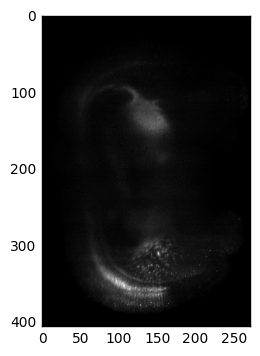

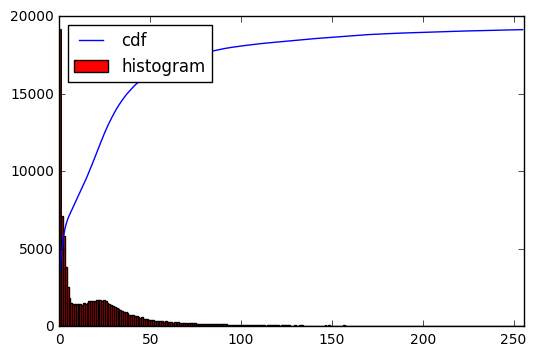

In [77]:
path = "img/Fear199_thresh.nii"

real_im = nib.load(path)
real_im = real_im.get_data()

real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [78]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# img_grey = np.array(imgflat * 255, dtype = np.uint8)

img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

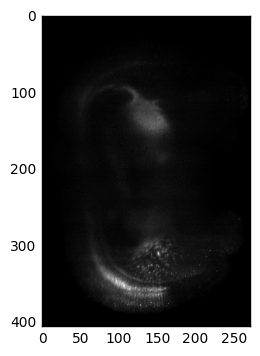

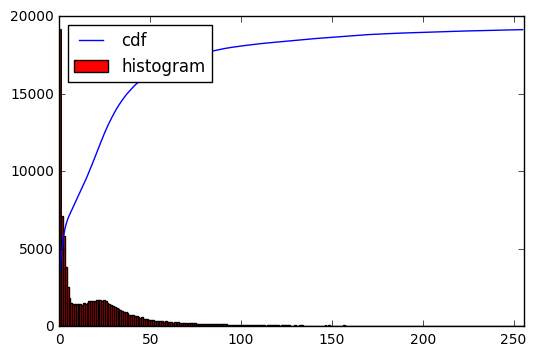

In [79]:
old_img = img_grey.reshape(x_value, y_value, z_value)

old_slice = old_img[:,:,250]

plt.imshow(old_slice, cmap='gray')
plt.show()

plot_hist(old_slice)

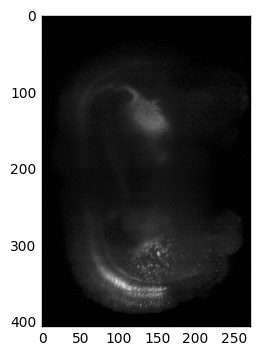

In [80]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

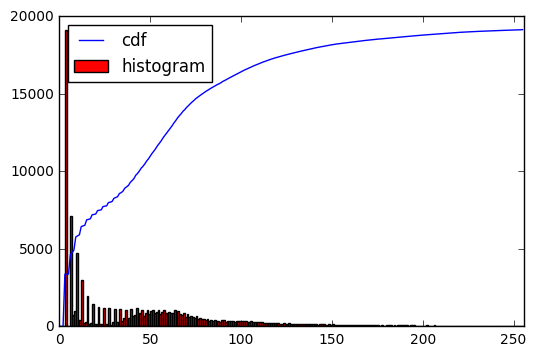

In [81]:
plot_hist(clahe_slice)

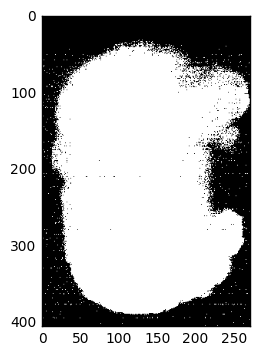

In [82]:
fear_t = thresh(newer_img, 20)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

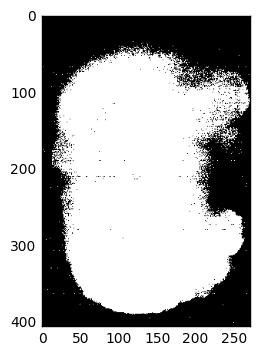

In [85]:
fear_t = thresh(newer_img, 30)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

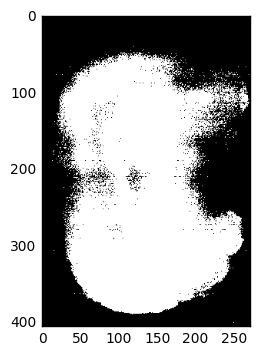

In [84]:
fear_t = thresh(newer_img, 40)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

## OLD SHIT

In [9]:
path = "img/Fear199_thresh.nii"

real_im = nib.load(path)
real_im = real_im.get_data()
img = real_im[:,:,:]

img = np.int16(255 * (np.float32(img) / np.float32(np.max(img))))


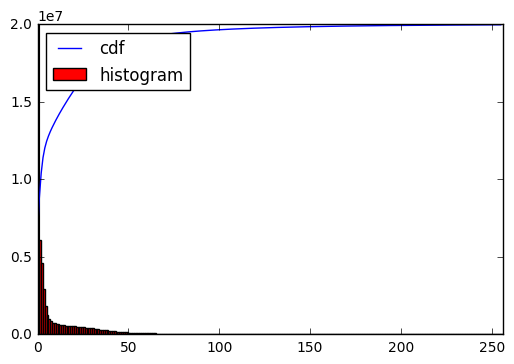

In [68]:
plot_hist(real_im)

In [70]:
print(real_im.shape)

(405, 272, 537)


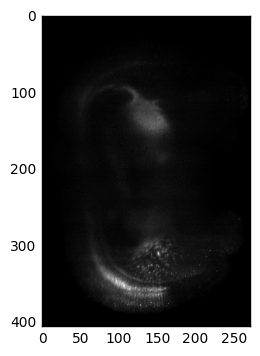

In [23]:
real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

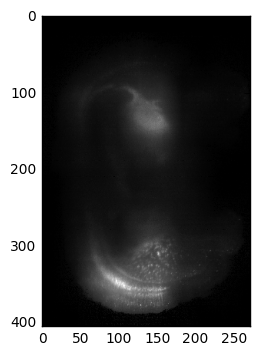

In [24]:
# create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=44.0, tileGridSize=(10,10))
slice_clahe = clahe.apply(real_slice)

plt.imshow(slice_clahe, cmap='gray')
plt.show()

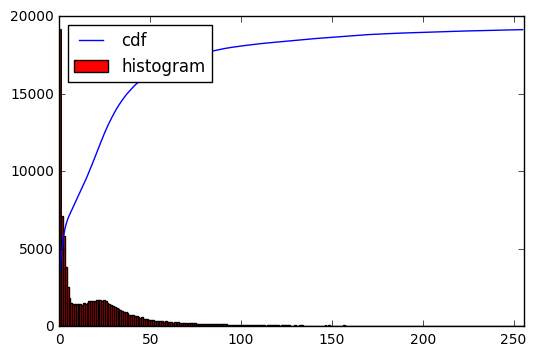

In [25]:
plot_hist(real_slice)

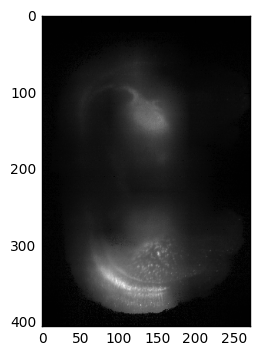

In [26]:
# create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
slice_clahe = clahe.apply(real_slice)

plt.imshow(slice_clahe, cmap='gray')
plt.show()

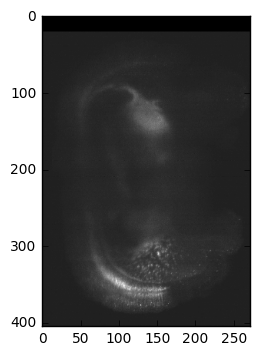

In [84]:
real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

In [ ]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
slice_clahe = clahe.apply(real_slice)

plt.imshow(slice_clahe, cmap='gray')
plt.show()

In [ ]:
plot_hist(real_slice)
plot_hist(slice_clahe)

### Real data analysis: Fear199

Now it becomes much easier to identify the brightpoints in the image because the points representing the background (intensity of 0) are very far from the ones representing the actual brain

In [ ]:
path = "img/Fear199_thresh.nii"

real_im_t = nib.load(path)
real_im_t = real_im_t.get_data()
img = real_im[:,:,:]

img = np.int16(255 * (np.float32(img) / np.float32(np.max(img))))

In [ ]:
real_slice_t = real_im_t[:,:,250]

plt.imshow(real_slice_t, cmap='gray')
plt.show()

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clahe = cv2.createCLAHE(clipLimit=44.0, tileGridSize=(10,10))
slice_clahe_t = clahe.apply(real_slice_t)

plt.imshow(slice_clahe_t, cmap='gray')
plt.show()

In [ ]:
plot_hist(real_slice_t)
plot_hist(slice_clahe_t)

### Testing on Aut1367

In [ ]:
inToken = "Aut1367"

autImg = imgDownload(inToken, resolution=5)
imgShow(autImg, vmax=500)

autImg_backup = img_copy(autImg)

In [ ]:
refToken = "ara_ccf2"
refImg = imgDownload(refToken)
imgShow(refImg, vmax=500)

# refAnnoImg = imgDownload(refToken, channel="annotation")ii
# imgShow(refAnnoImg, vmax=1000)

print(refImg.GetSpacing())
print(inImg.GetSpacing())

In [ ]:
autImg = img_copy(autImg_backup)
# imgShow(autImg, vmax=500)

In [ ]:
# Respacing according to the reference image
autImg = imgResample(autImg, spacing=refImg.GetSpacing())
# imgShow(inImg, vmax=500)

# Reorienting
autImg = imgReorient(autImg, "RPS", "RSA")
imgShow(autImg, vmax=500)

# Thresholding
(values, bins) = np.histogram(sitk.GetArrayFromImage(autImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

# counts = np.bincount(values)
# maximum = np.argmax(bins)
# print(maximum)
# # print(counts)

# lowerThreshold = maximum
# upperThreshold = sitk.GetArrayFromImage(inImg).max()+1


# # 3, 2, 1
# inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
# imgShow(inImg, vmax = 500)

# (values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
# plt.plot(bins[:-1], values)

# Saving image
location = "img/" + 'Aut1367' + ".nii"
imgWrite(autImg, str(location))

In [ ]:
path = "img/Aut1367.nii"

aut_im = nib.load(path)
aut_im = aut_im.get_data()
print(aut_im.shape)
# img = real_im[:,:,:]

# img = np.int16(255 * (np.float32(img) / np.float32(np.max(img))))

In [ ]:
aut_slice = aut_im[:,:,400]

plt.imshow(aut_slice, cmap='gray')
plt.show()

In [ ]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
aut_slice_clahe = clahe.apply(aut_slice)

plt.imshow(aut_slice_clahe, cmap='gray')
plt.show()

In [ ]:
plot_hist(aut_slice)
plot_hist(aut_slice_clahe)

## 3d clahe testing

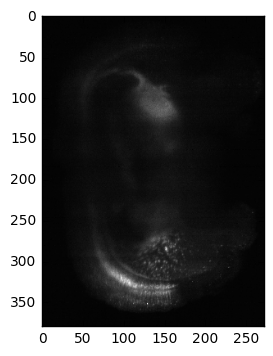

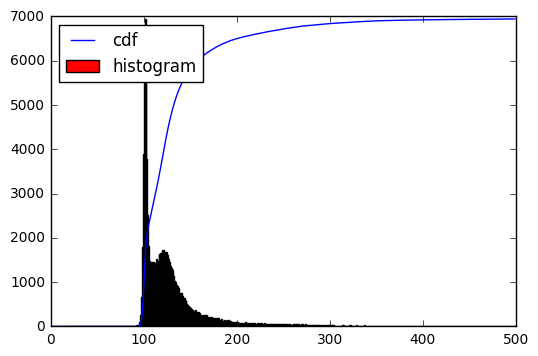

In [145]:
path = "img/Fear199.nii"

real_im = nib.load(path)
real_im = real_im.get_data()

real_im = real_im[25:real_im.shape[0],:,:]

real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [146]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img_grey = np.array(imgflat * 255, dtype = np.uint8)

# img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

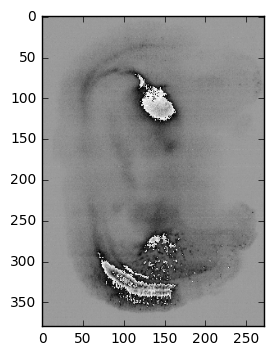

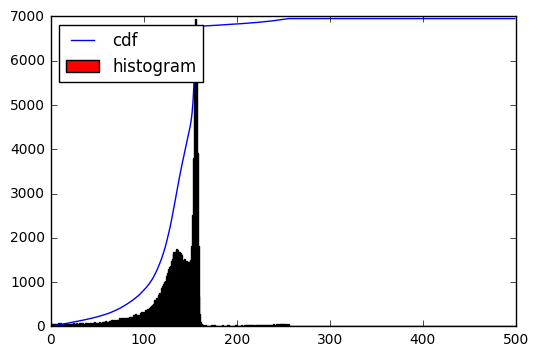

In [147]:
old_img = img_grey.reshape(x_value, y_value, z_value)

old_slice = old_img[:,:,250]

plt.imshow(old_slice, cmap='gray')
plt.show()

plot_hist(old_slice)

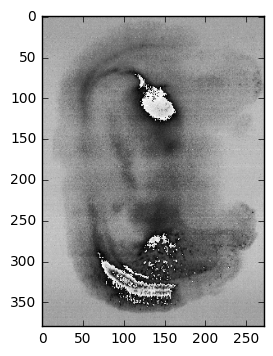

In [148]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

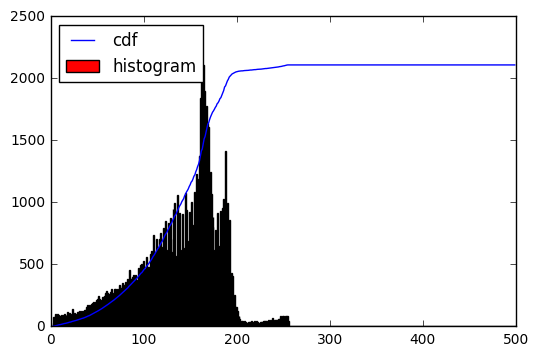

In [149]:
plot_hist(clahe_slice)

In [30]:
def invert(im):
    im = (255-im)
    return im

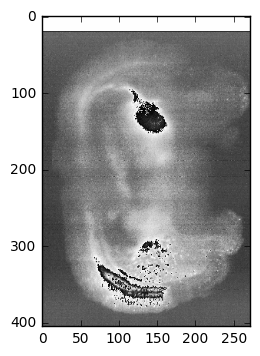

In [31]:
fear199_clahe3d = invert(newer_img)

fear199_slice = fear199_clahe3d[:,:,250]

plt.imshow(fear199_slice, cmap='gray')
plt.show()

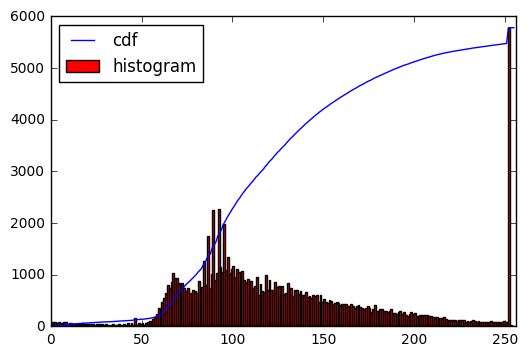

In [32]:
plot_hist(fear199_slice)

In [25]:
def thresh(im, val):
    """Thresholding the image s.t. any pixel with intensity less than val is set to 0, and
    and pixel with intensity above is set to 255. 
    """
    im_t = np.copy(im)
    
    count_above = 0

    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            for z in range(im.shape[2]):
                if im[x, y, z] < val:
                    im_t[x, y, z] = 0
                else:
                    im_t[x, y, z] = 255
                    count_above += 1
                    
    print('num points above thresh: %d' % count_above)
                    
    return im_t

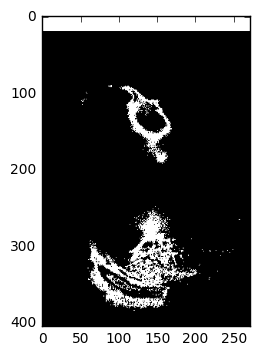

In [34]:
fear199_t = thresh(fear199_clahe3d, 200)

clahe_slice = fear199_t[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

In [35]:
print(fear199_t.dtype)
print(imgflat.dtype)

uint8
uint16


### round 2

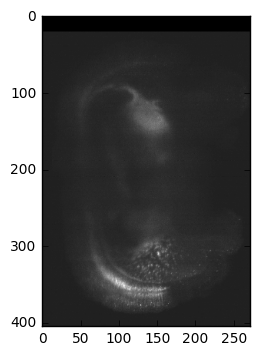

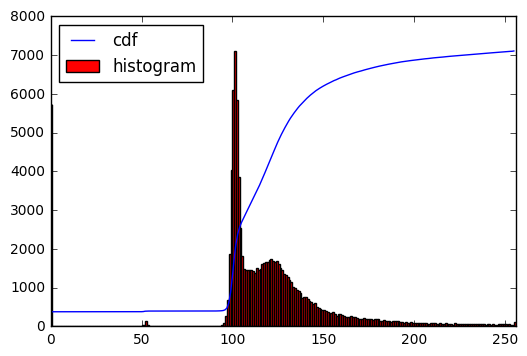

In [116]:
path = "img/Fear199.nii"

real_im = nib.load(path)
real_im = real_im.get_data()

real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [117]:
fear_im = real_im[25:real_im.shape[0],:,:]

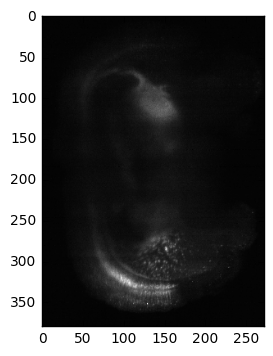

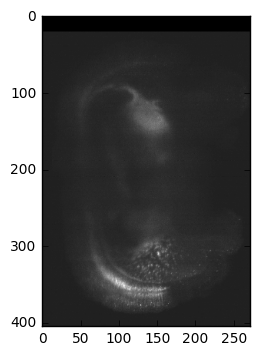

In [118]:
c_slice = fear_im[:,:,250]

plt.imshow(c_slice, cmap='gray')
plt.show()

real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

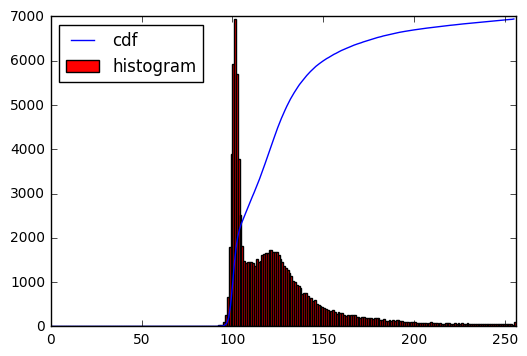

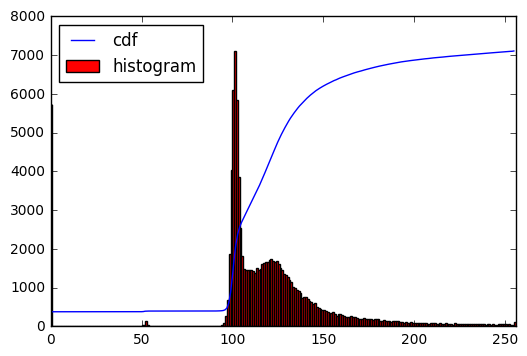

In [119]:
plot_hist(c_slice)
plot_hist(real_slice)

In [120]:
x_value = fear_im.shape[0]
y_value = fear_im.shape[1]
z_value = fear_im.shape[2]

imgflat = fear_im.reshape(-1)

In [137]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))

# img_grey = np.array(imgflat * 255, dtype = np.uint8)

img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

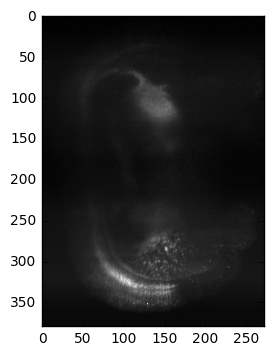

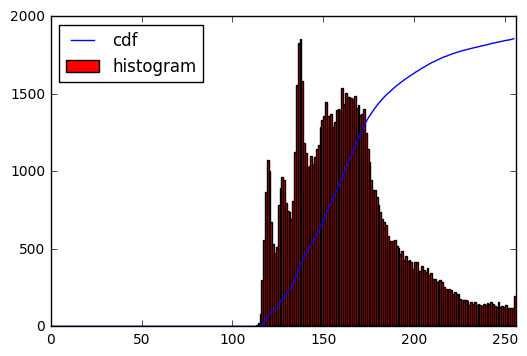

In [138]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

plot_hist(clahe_slice)

100
100
812


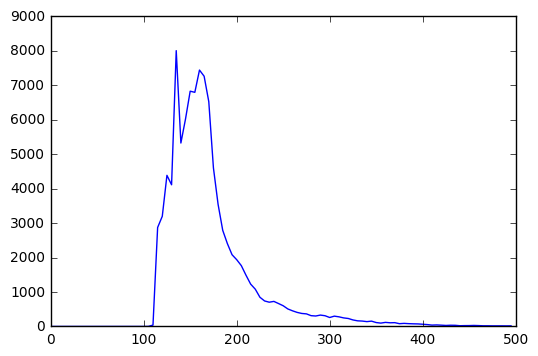

In [139]:
# Thresholding
(values, bins) = np.histogram(clahe_slice, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

counts = np.bincount(values)
maximum = np.argmax(bins)
print(maximum)
# print(counts)

lowerThreshold = maximum
upperThreshold = clahe_slice.max()+1
print(lowerThreshold)
print(upperThreshold)

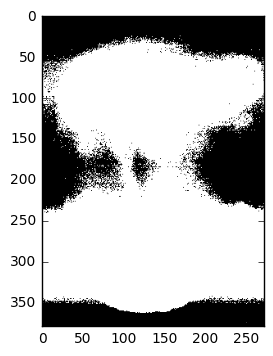

In [141]:
newer_img_t = thresh(newer_img, 150)

slice = newer_img_t[:,:,250]

plt.imshow(slice, cmap='gray')
plt.show()

100
100
818


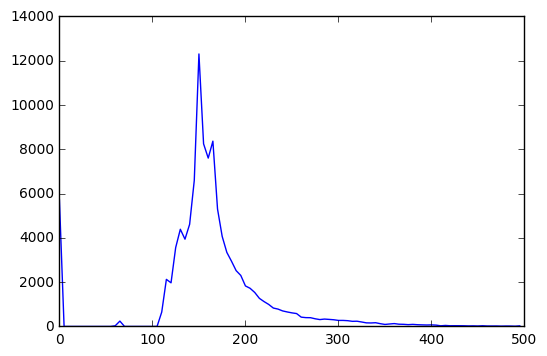

In [43]:
# Thresholding
(values, bins) = np.histogram(clahe_slice, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

counts = np.bincount(values)
maximum = np.argmax(bins)
print(maximum)
# print(counts)

lowerThreshold = maximum
upperThreshold = clahe_slice.max()+1
print(lowerThreshold)
print(upperThreshold)

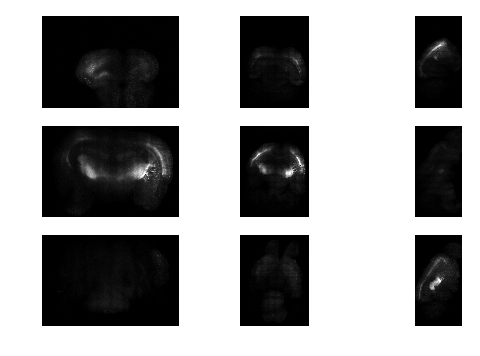

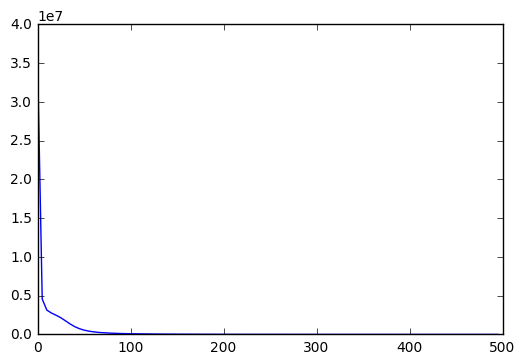

In [44]:
inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500)

(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

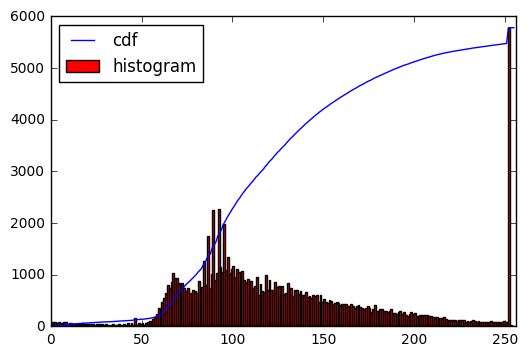

In [45]:
plot_hist(fear199_slice)

## Round 3

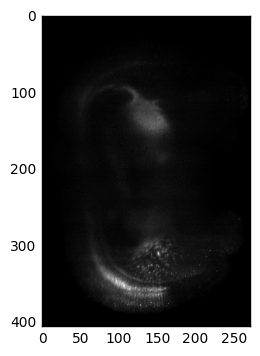

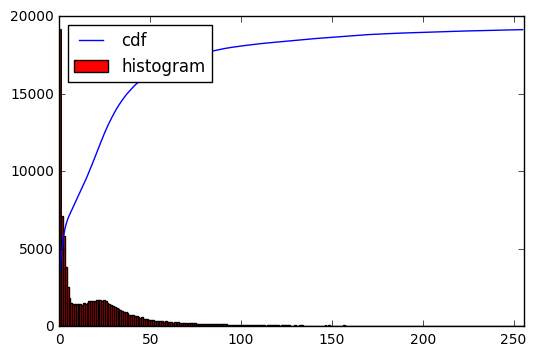

In [77]:
path = "img/Fear199_thresh.nii"

real_im = nib.load(path)
real_im = real_im.get_data()

real_slice = real_im[:,:,250]

plt.imshow(real_slice, cmap='gray')
plt.show()

plot_hist(real_slice)

x_value = real_im.shape[0]
y_value = real_im.shape[1]
z_value = real_im.shape[2]

imgflat = real_im.reshape(-1)

In [78]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# img_grey = np.array(imgflat * 255, dtype = np.uint8)

img_grey = imgflat

cl1 = clahe.apply(img_grey)

newer_img = cl1.reshape(x_value, y_value, z_value)

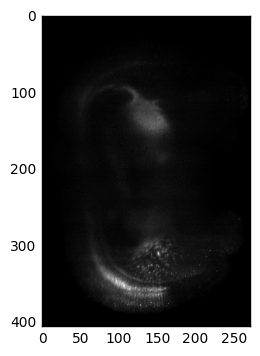

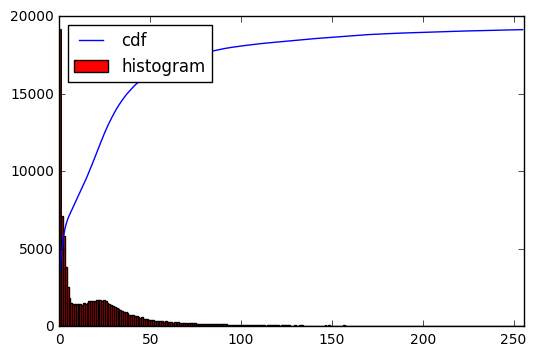

In [79]:
old_img = img_grey.reshape(x_value, y_value, z_value)

old_slice = old_img[:,:,250]

plt.imshow(old_slice, cmap='gray')
plt.show()

plot_hist(old_slice)

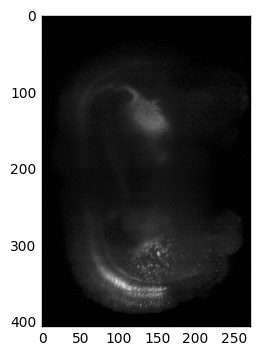

In [80]:
clahe_slice = newer_img[:,:,250]

plt.imshow(clahe_slice, cmap='gray')
plt.show()

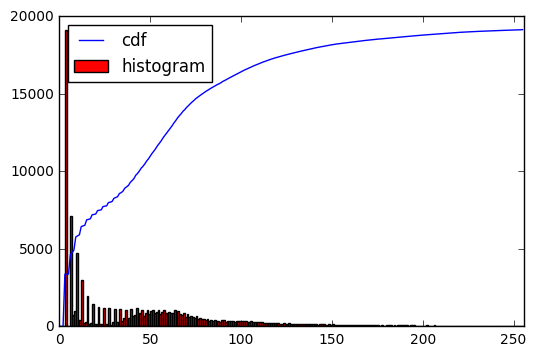

In [81]:
plot_hist(clahe_slice)

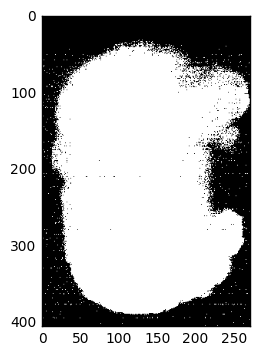

In [82]:
fear_t = thresh(newer_img, 20)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

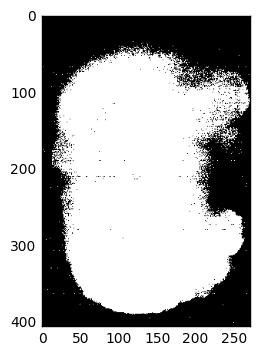

In [85]:
fear_t = thresh(newer_img, 30)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

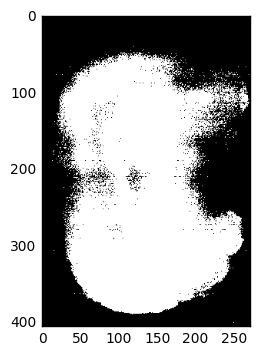

In [84]:
fear_t = thresh(newer_img, 40)

s = fear_t[:,:,250]

plt.imshow(s, cmap='gray')
plt.show()

In [69]:
count = 0
for x in range(0, real_im.shape[0]):
    for y in range(0, real_im.shape[1]):
        for z in range(real_im.shape[2]):
            if real_im[x, y, z] > 255:
                count += 1
                
print count

173350


In [76]:
# imgflat = real_im.reshape(-1)

# hist, bins = np.histogram(real_im, 256, [0, 256])

hist, bins = np.histogram(real_im, 256, [0, real_im.max()+1])

cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max() / cdf.max()
cdf_normalized = cdf / cdf.max()

print(cdf_normalized.shape)

print(real_im.max())

# cdf_normalized = cdf_normalized / float(cdf_normalized.max())

working_im = np.copy(newer_img)

for x in range(0, working_im.shape[0]):
    for y in range(0, working_im.shape[1]):
        for z in range(working_im.shape[2]):
            intensity = working_im[x, y, z]
            cdf_value = cdf_normalized[intensity]
            if cdf_value < 0.05:
                working_im[x, y, z] = 255
            else:
                working_im[x, y, z] = 0
                
slc = fear_t[:,:,250]

plt.imshow(slc, cmap='gray')
plt.show()

(256,)
3969


IndexError: index 263 is out of bounds for axis 0 with size 256

## Miscellaneous testing

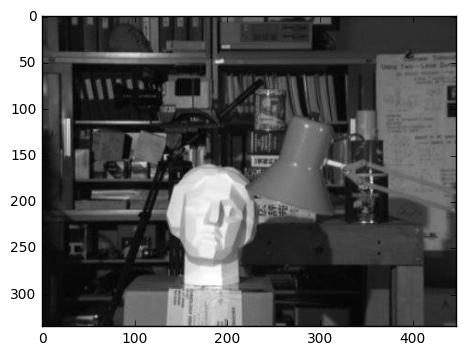

In [104]:
im = cv2.imread('images/test.png')

# plt.imshow(im)
# plt.show()

im_disp = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_disp)
plt.show()

In [105]:
print(im)
print(im.shape)

[[[46 46 46]
  [48 48 48]
  [46 46 46]
  ..., 
  [41 41 41]
  [40 40 40]
  [39 39 39]]

 [[50 50 50]
  [53 53 53]
  [51 51 51]
  ..., 
  [39 39 39]
  [38 38 38]
  [37 37 37]]

 [[44 44 44]
  [46 46 46]
  [44 44 44]
  ..., 
  [39 39 39]
  [38 38 38]
  [37 37 37]]

 ..., 
 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ..., 
  [69 69 69]
  [69 69 69]
  [68 68 68]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ..., 
  [81 81 81]
  [80 80 80]
  [78 78 78]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ..., 
  [85 85 85]
  [85 85 85]
  [83 83 83]]]
(335, 448, 3)


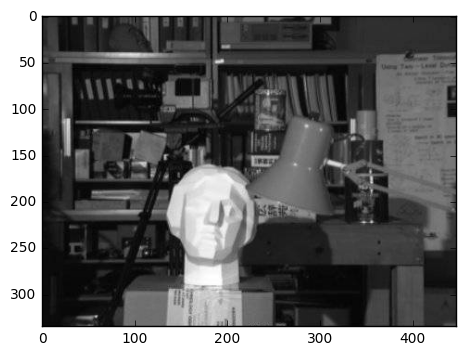

In [106]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# plt.axis("off")
plt.imshow(im_gray, cmap='gray')
plt.show()

In [108]:
print(im_gray)
print(im_gray.shape)

[[46 48 46 ..., 41 40 39]
 [50 53 51 ..., 39 38 37]
 [44 46 44 ..., 39 38 37]
 ..., 
 [12 12 12 ..., 69 69 68]
 [12 12 12 ..., 81 80 78]
 [ 9  9  9 ..., 85 85 83]]
(335, 448)


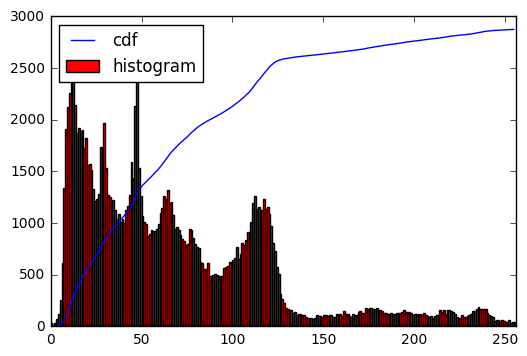

In [109]:
hist,bins = np.histogram(im_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(im_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [19]:
# create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE()
im_clahe = clahe.apply(im_gray)

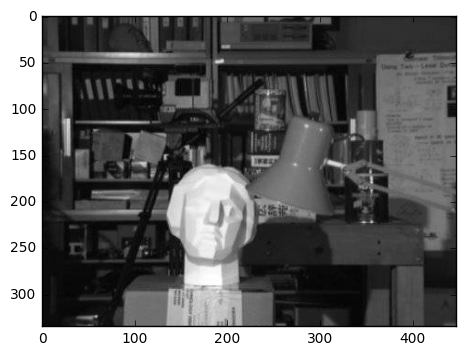

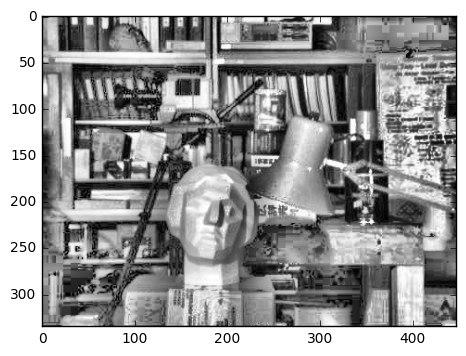

In [20]:
plt.imshow(im_gray, cmap='gray')
plt.show()

plt.imshow(im_clahe, cmap='gray')
plt.show()

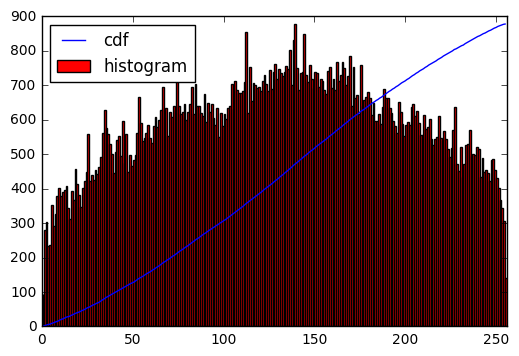

In [21]:
hist,bins = np.histogram(im_clahe.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(im_clahe.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [52]:
print(real_im.shape)

(405, 272, 537)


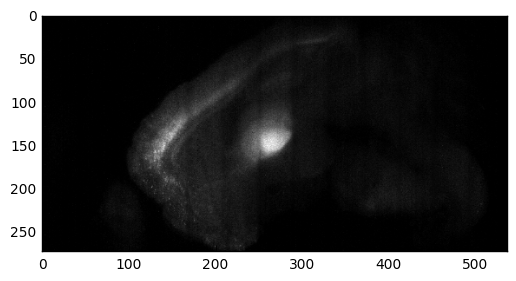

In [50]:
real_slice = real_im[150,:,:]

plt.imshow(real_slice, cmap='gray')
plt.show()

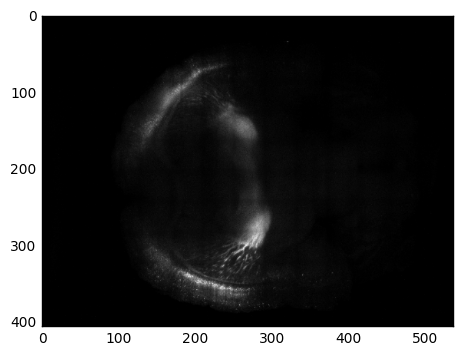

In [49]:
real_slice = real_im[:,150,:]

plt.imshow(real_slice, cmap='gray')
plt.show()

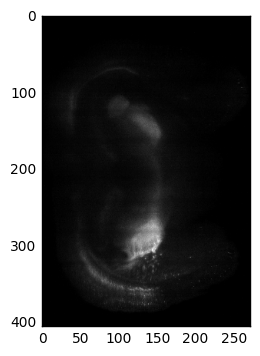

In [51]:
real_slice = real_im[:,:,275]

plt.imshow(real_slice, cmap='gray')
plt.show()

In [ ]:
img_grey = np.array(imgflat * 255, dtype = np.uint8)